In [10]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern, RationalQuadratic
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

#add other feature that can contribute to the emissions forecast such as economic indicator, and population, and vehicles miles travelled data. 

# Load your data
data = pd.read_excel('../../../data/raw/Public GHG data 1990-2021.xlsx', sheet_name="Emission Totals")


data

,Sector Emissions (MMTCO2e),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2016,2017,2018,2019,2020,2021 (ESTIMATE),2021 % of Total Emissions,% change from 1990,% change from last year,% change from 2001
0,Agriculture,0.375261,0.348502,0.389088,0.415000,0.408122,0.400748,0.344938,0.348057,0.375380,...,0.339883,0.341291,0.350344,0.369979,0.346028,0.350000,0.010075,-0.067316,0.011480,-0.062704
1,Natural Gas Leakage,0.794155,0.762277,0.747679,0.720340,0.695204,0.668485,0.638662,0.614303,0.588198,...,0.245919,0.243363,0.240438,0.241217,0.240000,0.240000,0.006909,-0.697792,0.000000,-0.532010
2,Commercial,3.828568,3.662331,4.312955,3.843474,4.172272,3.841800,4.133427,4.301810,4.036593,...,3.907677,3.920870,4.329612,4.196598,3.824505,4.001450,0.115189,0.045156,0.046266,-0.073598
3,Commercial (CO2FFC),3.802622,3.636449,4.283215,3.814070,4.142831,3.813977,4.103763,4.273123,4.010713,...,3.885436,3.898378,4.306234,4.173702,3.803173,3.979450,0.114555,0.046502,0.046350,-0.072990
4,Commercial (Stationary),0.025946,0.025882,0.029740,0.029404,0.029441,0.027823,0.029664,0.028687,0.025880,...,0.022242,0.022492,0.023378,0.022896,0.021332,0.022000,0.000633,-0.152093,0.031333,-0.171856
5,Electric Power (Consumption),11.908703,12.015808,11.282676,10.228667,10.395885,10.320433,10.734700,13.201970,12.948870,...,9.289161,8.501146,8.066976,5.690000,3.200000,3.040000,0.087512,-0.744725,-0.050000,-0.753715
6,Electric Power (Generation),12.125818,11.775872,9.771757,8.650563,8.513378,9.737109,11.311067,14.507413,13.348240,...,8.574717,7.866282,9.589895,9.523774,10.206000,10.955000,0.315358,-0.096556,0.073388,-0.040398
7,CO2 (EIA State Energy Profile),12.084447,11.736217,9.738805,8.621568,8.485521,9.707468,11.276329,14.462553,13.308563,...,8.558718,7.854365,9.574281,9.510000,10.186000,10.940000,0.314926,-0.094704,0.074023,-0.038865
8,CH4 and N2O (Stationary),0.041371,0.039655,0.032952,0.028995,0.027857,0.029641,0.034738,0.044860,0.039677,...,0.015998,0.011917,0.015615,0.013774,0.020000,0.015000,0.000432,-0.637431,-0.250000,-0.556474
9,Industrial,3.001041,3.100758,3.355918,3.447719,3.150548,3.103303,3.257568,3.266450,3.119599,...,3.152446,3.123419,3.137983,3.146549,3.128899,3.376378,0.097195,0.125069,0.079094,0.011279


In [11]:
selected_columns = data.iloc[5, 1:33]
selected_columns

1990               11.908703
1991               12.015808
1992               11.282676
1993               10.228667
1994               10.395885
1995               10.320433
1996                 10.7347
1997                13.20197
1998                12.94887
1999               12.210134
2000               11.989901
2001               12.343416
2002               11.983739
2003               12.355896
2004               12.228979
2005               12.670139
2006               11.081421
2007               11.291855
2008               10.093073
2009               11.454199
2010               11.964953
2011               10.461509
2012                9.630228
2013                9.473056
2014                9.811699
2015               10.185915
2016                9.289161
2017                8.501146
2018                8.066976
2019                    5.69
2020                     3.2
2021 (ESTIMATE)         3.04
Name: 5, dtype: object

In [12]:
#define a set of candidate kernel: radial basis function, matern kernel, rational quadratic, exponential kernel
#implement a model selection strategy: using cross-validation to evaluate the performance of each kernel on your dataset; leave-one-out cross validation for the limited dataset
#optimize hyperparameters: for each kernel, optimize its hyperparameters using maximu likelihood estimate or other optimization methods
#compare the 

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct, ConstantKernel as C, ExpSineSquared
import matplotlib.pyplot as plt

# Sample data
# data = {
#     'Year': np.arange(1990, 2022),
#     'Emissions': [
#         15.120625, 15.005884, 15.086747, 15.146864, 15.066461,
#         14.815692, 15.623592, 15.67985, 15.917011, 17.112669,
#         16.658678, 17.301097, 17.195188, 17.921412, 19.535977,
#         18.506215, 17.733149, 17.626947, 16.587534, 16.224746,
#         16.038716, 15.745639, 15.308146, 15.060186, 15.016348,
#         15.087477, 15.21436, 15.325243, 15.63322, 15.399656,
#         13.071437, 14.766522
#     ]
# }


data = {
    'Year': np.arange(1990, 2022),
    'Emissions': [
        11.908703, 12.015808, 11.282676, 10.228667, 10.395885,
        10.320433, 10.7347, 13.20197, 12.94887, 12.210134,
        11.989901, 12.343416, 11.983739, 12.355896, 12.228979,
        12.670139, 11.081421, 11.291855, 10.093073, 11.454199,
        11.964953, 10.461509, 9.630228, 9.473056, 9.811699,
        10.185915, 9.289161, 8.501146, 8.066976, 5.69,
        3.2, 3.04  # Last value is an estimate
    ]
}

df = pd.DataFrame(data)
selected_columns = df[['Year']]  # Ensure this is a DataFrame
y = df['Emissions'].values  # This is a 1D array



Kernel: 1**2 * RBF(length_scale=1), Log-Marginal Likelihood: -25.0041665683921
Kernel: 1**2 * Matern(length_scale=1, nu=1.5), Log-Marginal Likelihood: -24.8163682783293
Kernel: 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), Log-Marginal Likelihood: -24.92113411799481
Kernel: 1**2 * DotProduct(sigma_0=1) + RBF(length_scale=1), Log-Marginal Likelihood: -23.82021839989921
Kernel: 1**2 * RBF(length_scale=1) + ExpSineSquared(length_scale=1, periodicity=10), Log-Marginal Likelihood: -24.49740411337465


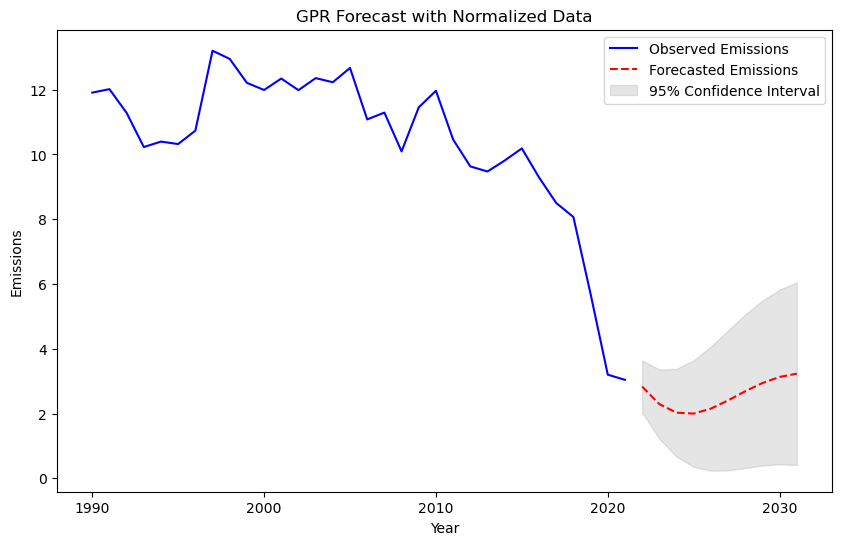

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct, ConstantKernel as C, ExpSineSquared
import numpy as np
import matplotlib.pyplot as plt

# Assume selected_columns and y are already defined properly
# selected_columns should be a 1D series or DataFrame column
# y should be a 1D array or series

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Reshape selected_columns to be 2D
X_scaled = scaler_X.fit_transform(selected_columns.values.reshape(-1, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Define kernels
kernels = [
    C(1.0, (1e-2, 1e2)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)),
    C(1.0, (1e-2, 1e2)) * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2), nu=1.5),
    C(1.0, (1e-2, 1e2)) * RationalQuadratic(length_scale=1.0, alpha=0.1),
    C(1.0, (1e-2, 1e2)) * DotProduct(sigma_0=1.0) + RBF(length_scale=1.0),
    C(1.0, (1e-2, 1e2)) * (RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) +
                            ExpSineSquared(length_scale=1.0, periodicity=10))
]

# Train GPR models with normalized data
best_score = -np.inf  # Initialize best_score
for kernel in kernels:
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.2)
    gpr.fit(X_scaled, y_scaled)

    score = gpr.log_marginal_likelihood_value_ #training or test error# generate all the parameter and the error: generate table
    print(f'Kernel: {kernel}, Log-Marginal Likelihood: {score}')

    if score > best_score:
        best_score = score
        best_kernel = kernel
        best_model = gpr

# Predict future emissions with normalized data
future_years = np.arange(2022, 2032).reshape(-1, 1)
future_years_scaled = scaler_X.transform(future_years)

# Perform predictions
predictions_scaled, std_scaled = best_model.predict(future_years_scaled, return_std=True)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions'], 'b-', label='Observed Emissions')
plt.plot(future_years, predictions, 'r--', label='Forecasted Emissions')
plt.fill_between(future_years.ravel(), predictions.ravel() - 1.96 * std_scaled, predictions.ravel() + 1.96 * std_scaled, alpha=0.2, color='gray', label='95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.title('GPR Forecast with Normalized Data')
plt.show()



In [15]:
best_model

GaussianProcessRegressor(alpha=0.2,
                         kernel=1**2 * DotProduct(sigma_0=1) + RBF(length_scale=1),
                         n_restarts_optimizer=10)

Kernel: 1**2 * RBF(length_scale=1), Mean MSE: 0.15020642706026263, Mean RMSE: 0.31886890056273465, Mean MAE: 0.31886890056273465
Kernel: 1**2 * Matern(length_scale=1, nu=1.5), Mean MSE: 0.1308104913191646, Mean RMSE: 0.2900033970316816, Mean MAE: 0.2900033970316816


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Kernel: 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), Mean MSE: 0.14838382151199914, Mean RMSE: 0.31490590043089656, Mean MAE: 0.31490590043089656


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\

Kernel: 1**2 * DotProduct(sigma_0=1) + RBF(length_scale=1), Mean MSE: 0.14109694612921655, Mean RMSE: 0.3083493879192075, Mean MAE: 0.3083493879192075
Kernel: 1**2 * RBF(length_scale=1) + ExpSineSquared(length_scale=1, periodicity=10), Mean MSE: 0.1762038478444486, Mean RMSE: 0.35142311325750647, Mean MAE: 0.35142311325750647


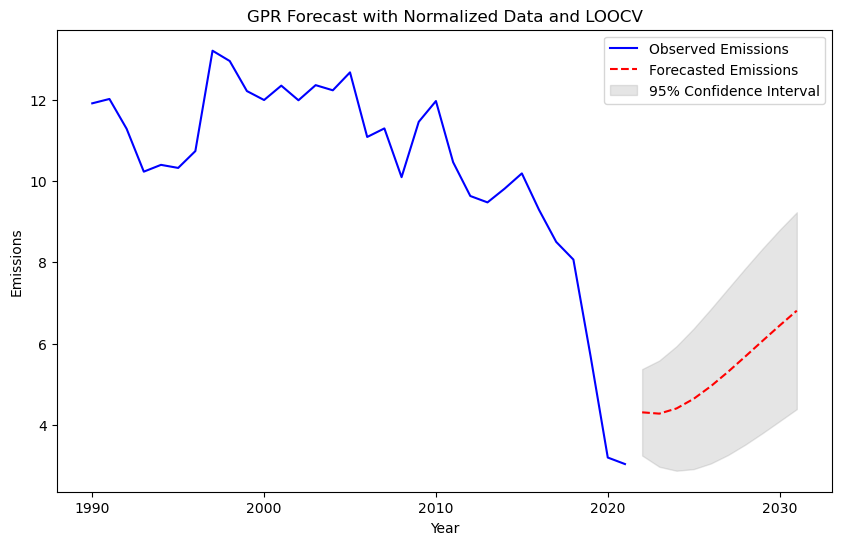

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, DotProduct, ConstantKernel as C, ExpSineSquared
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Reshape selected_columns to be 2D
X_scaled = scaler_X.fit_transform(selected_columns.values.reshape(-1, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Define kernels
kernels = [
    C(1.0, (1e-2, 1e2)) * RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3)),
    C(1.0, (1e-2, 1e2)) * Matern(length_scale=1.0, length_scale_bounds=(1e-3, 1e3), nu=1.5),
    C(1.0, (1e-2, 1e2)) * RationalQuadratic(length_scale=1.0, alpha=0.1),
    C(1.0, (1e-2, 1e2)) * DotProduct(sigma_0=1.0) + RBF(length_scale=1.0),
    C(1.0, (1e-2, 1e2)) * (RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3)) +
                            ExpSineSquared(length_scale=1.0, periodicity=10))
]



# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Train GPR models with normalized data using LOOCV
best_score = np.inf  # Initialize best_score to infinity for comparison
for kernel in kernels:
    mse_scores, rmse_scores, mae_scores = [], [], []
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.2)

    # Leave-One-Out Cross Validation
    for train_index, test_index in loo.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_scaled[train_index], y_scaled[test_index]

        # Fit the model and predict on the test set
        gpr.fit(X_train, y_train)
        y_pred = gpr.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        # Append to lists
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Compute the mean of the scores for each metric
    mean_mse = np.mean(mse_scores)
    mean_rmse = np.mean(rmse_scores)
    mean_mae = np.mean(mae_scores)
    print(f'Kernel: {kernel}, Mean MSE: {mean_mse}, Mean RMSE: {mean_rmse}, Mean MAE: {mean_mae}')

    # Update the best model if current mean_mse is lower
    if mean_mse < best_score:
        best_score = mean_mse
        best_kernel = kernel
        best_model = gpr

# Predict future emissions with normalized data
future_years = np.arange(2022, 2032).reshape(-1, 1)
future_years_scaled = scaler_X.transform(future_years)

# Perform predictions
predictions_scaled, std_scaled = best_model.predict(future_years_scaled, return_std=True)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Emissions'], 'b-', label='Observed Emissions')
plt.plot(future_years, predictions, 'r--', label='Forecasted Emissions')
plt.fill_between(future_years.ravel(), predictions.ravel() - 1.96 * std_scaled, predictions.ravel() + 1.96 * std_scaled, alpha=0.2, color='gray', label='95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.title('GPR Forecast with Normalized Data and LOOCV')
plt.show()


In [12]:
best_model

GaussianProcessRegressor(alpha=0.2,
                         kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10)

In [9]:
#apply the data to the regional level data

In [17]:

elec_data = pd.read_csv('../../../data/tidy/electricity-emissions-msa.csv')
elec_data

,year,New Haven (MMTCO2e),Hartford (MMTCO2e),Bridgeport (MMTCO2e)
0,2016-01-01,1.430073,1.924097,1.792147
1,2017-01-01,1.355028,2.231089,1.706469
2,2018-01-01,1.449108,2.108849,1.726713
3,2019-01-01,1.374215,1.844642,1.674141
4,2020-01-01,1.303380,1.756536,1.590311
5,2021-01-01,1.314940,1.790219,1.671623
6,2022-01-01,1.353627,1.842788,1.688185


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


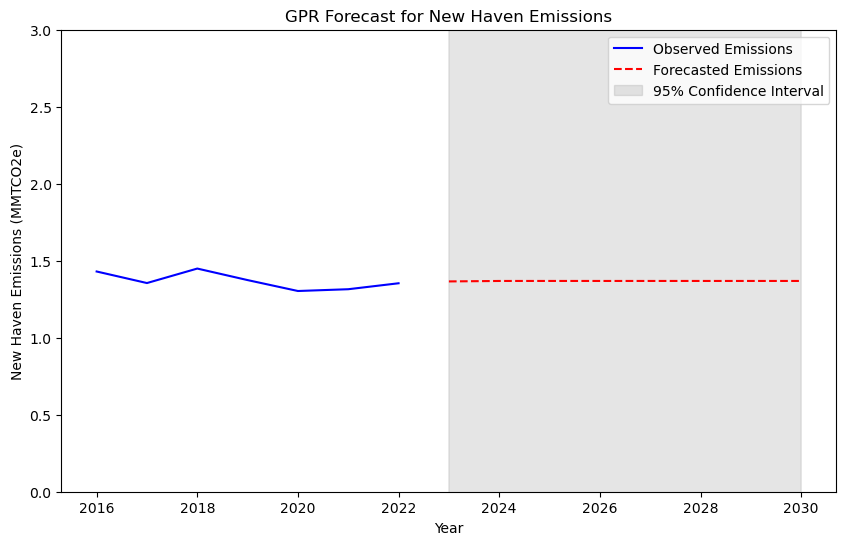

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

# Define the data
data = {
    'year': [
        '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', 
        '2020-01-01', '2021-01-01', '2022-01-01'
    ],
    'New Haven (MMTCO2e)': [
        1.430073, 1.355028, 1.449108, 1.374215, 
        1.303380, 1.314940, 1.353627
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'year' column to datetime and extract the year
df['year'] = pd.to_datetime(df['year']).dt.year

# Select 'year' as the feature and 'New Haven (MMTCO2e)' as the target
X = df[['year']].values  # Reshape to be a 2D array
y = df['New Haven (MMTCO2e)'].values  # 1D array

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Define the kernel
kernel=1**2 * DotProduct(sigma_0=1) + RBF(length_scale=1)

gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=0.8)
gpr.fit(X_scaled, y_scaled)

# Predict future emissions
future_years = np.arange(2023, 2031).reshape(-1, 1)
future_years_scaled = scaler_X.transform(future_years)
predictions_scaled, std_scaled = gpr.predict(future_years_scaled, return_std=True)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['New Haven (MMTCO2e)'], 'b-', label='Observed Emissions')
plt.plot(future_years, predictions, 'r--', label='Forecasted Emissions')
plt.fill_between(future_years.ravel(), predictions.ravel() - 1.96 * std_scaled, predictions.ravel() + 1.96 * std_scaled, alpha=0.2, color='gray', label='95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('New Haven Emissions (MMTCO2e)')
plt.legend()
plt.title('GPR Forecast for New Haven Emissions')

# Set y-axis range and ticks
plt.ylim(0, 3)  # Set y-axis range from 0 to 3
plt.yticks(np.arange(0, 3.5, 0.5))  # Set y-axis ticks 
plt.show()
